#### Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore')

#### Importing Dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

#### Splitting the dataset into train and test data

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset.drop('Purchased', axis=1),
                                                    dataset['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

x_train.shape, x_test.shape

((280, 2), (120, 2))

### NORMALIZATION

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [6]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.5,0.4
std,0.2,0.3
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.7,0.5
max,1.0,1.0


#### Comparison of Standardized data with Normal data

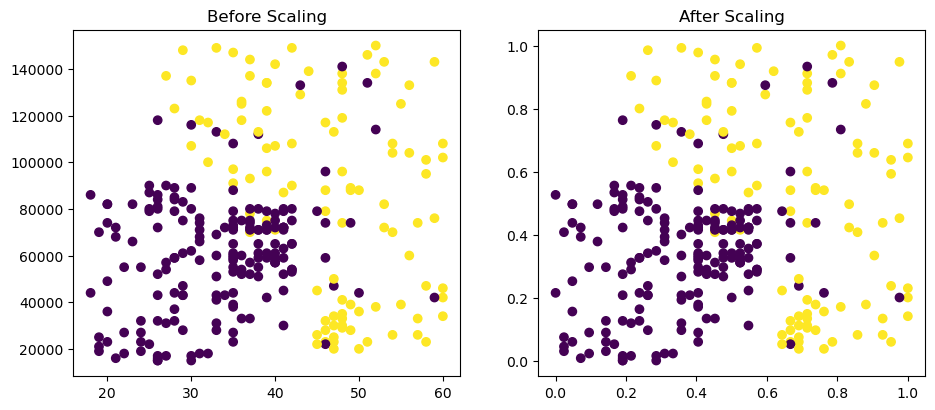

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 4.5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'], c = y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], c = y_train)
ax2.set_title("After Scaling")
plt.show()

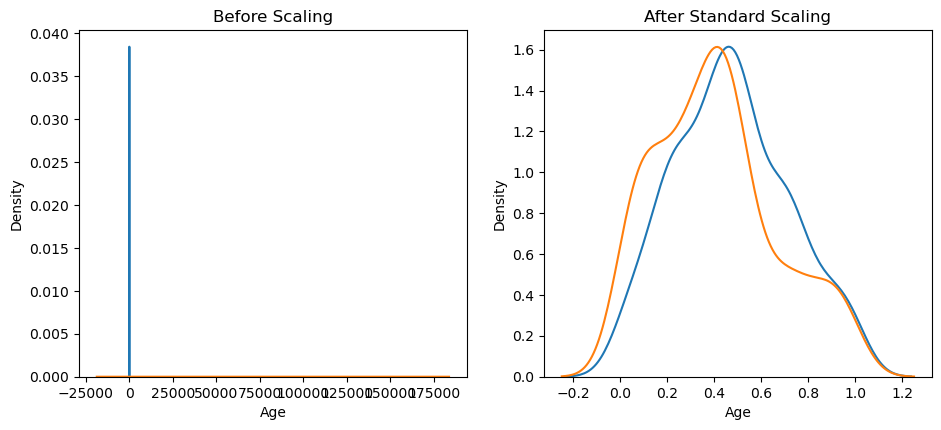

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 4.5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()